# Exploring my MiBand Data
December 21,2022

## The goal of this project was to practice:

1. How to export Xiaomi MiBand data 
2. Working with csv data format
3. Visualizations
4. Statistics in Python

## The general outline of this notebook is as follows:
1. Import or install necessary libraries
2. Read in and visualize data sets (heart rate, sleep, steps)
3. Analyses!
4. Summary and conclusion

## 1. Import and install the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from time import sleep
import datetime

#plotting
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Let's read one file with heart rate data 

In [4]:
hr_data_sample = pd.read_csv("E:/Studies/GitHub/Projects/Exploring my MiFit Data/Bett's MiBand Data/Heartrate/HEARTRATE_1671526161503.csv")
hr_data_sample.head()

,time,heartRate
0,2022-09-30 04:38:18+0000,94
1,2022-09-01 09:14:59+0000,75
2,2022-08-25 05:48:20+0000,86
3,2022-06-24 08:54:34+0000,70
4,2022-06-10 12:57:24+0000,74


## 2. Read in and visualize data

### Heart Rate

In [9]:
#rename the column hearRate to beat per min(bpm)
hr_data_sample.rename(columns={'heartRate' : 'bpm'}, inplace=True)
#lets see if it has been renamed
hr_data_sample.columns

Index(['time', 'bpm'], dtype='object', name='heartRate')

Let's have a look of how my heart rate looks

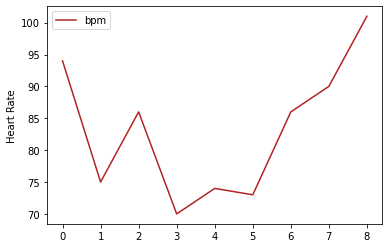

In [10]:
hr_data_sample.columns = ['time', 'bpm']
hr_data_sample.plot(color = "firebrick")
plt.ylabel('Heart Rate');

Not quite a lot of data, only had the Miband for roughly 8 months and there's a possibility I at times forgot to wear it.

In [12]:
#statistical summary
hr_data_sample.describe()

,bpm
count,9.000000
mean,83.222222
std,10.756135
min,70.000000
25%,74.000000
50%,86.000000
75%,90.000000
max,101.000000


### Sleep data

In [13]:
#read the exported sleep data
sleepdata = pd.read_csv("E:/Studies/GitHub/Projects/Exploring my MiFit Data/Bett's MiBand Data/Sleep/SLEEP_1671526161464.csv")
sleepdata.head()

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,REMTime,naps,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,11/11/2021,0,0,0,2021-11-09 21:00:00+0000,2021-11-09 21:00:00+0000,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/11/2021,61,400,2,2021-11-11 19:52:00+0000,2021-11-12 04:11:00+0000,36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13/11/2021,0,0,0,2021-11-11 21:00:00+0000,2021-11-11 21:00:00+0000,0,"[{\start\"":\""2019-04-14 00:36:13+0000\""","\""end\"":\""2019-04-14 00:37:06+0000\""}]""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14/11/2021,0,0,0,2021-11-12 21:00:00+0000,2021-11-12 21:00:00+0000,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/11/2021,64,290,59,2021-11-14 18:26:00+0000,2021-11-15 02:31:00+0000,72,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Many null values seems like there are times I forgot to sleep with the band on my wrist, lets drop them, plus I don't need the nap data for this analysis.

Let's select the columns that we need and store them in a new dataframe

In [18]:
#select date,deepsleeptime, shallowsleeptime, start, stop and REMTime
columns_to_select = ['date', 'deepSleepTime', 'shallowSleepTime', 'start', 'stop', 'REMTime']
sleepdat = sleepdata.loc[:, columns_to_select]
#first 5 rows
sleepdat.head()

,date,deepSleepTime,shallowSleepTime,start,stop,REMTime
0,11/11/2021,0,0,2021-11-09 21:00:00+0000,2021-11-09 21:00:00+0000,0
1,12/11/2021,61,400,2021-11-11 19:52:00+0000,2021-11-12 04:11:00+0000,36
2,13/11/2021,0,0,2021-11-11 21:00:00+0000,2021-11-11 21:00:00+0000,0
3,14/11/2021,0,0,2021-11-12 21:00:00+0000,2021-11-12 21:00:00+0000,0
4,15/11/2021,64,290,2021-11-14 18:26:00+0000,2021-11-15 02:31:00+0000,72


Since we have the start(when I go to bed) and stop(when I wake up), let's derive a column called hours to see the total hours of sleep I get in a day

In [31]:
#convert 'start' and 'stop' to datetime objects

sleepdat["start"] = pd.to_datetime(sleepdat["start"])
sleepdat["stop"] = pd.to_datetime(sleepdat["stop"])

# Calculate the difference between the start and stop times
sleepdat["diff"] = sleepdat["stop"] - sleepdat["start"]

# Extract the number of hours from the difference
sleepdat["hours"] = sleepdat["diff"].dt.total_seconds() / 3600

# Round the number of hours to the nearest integer
sleepdat["hours"] = sleepdat["hours"].round().astype(int)

# Display the dataframe
sleepdat.head()


,date,deepSleepTime,shallowSleepTime,start,stop,REMTime,diff,hours
0,11/11/2021,0,0,2021-11-09 21:00:00+00:00,2021-11-09 21:00:00+00:00,0,0 days 00:00:00,0
1,12/11/2021,61,400,2021-11-11 19:52:00+00:00,2021-11-12 04:11:00+00:00,36,0 days 08:19:00,8
2,13/11/2021,0,0,2021-11-11 21:00:00+00:00,2021-11-11 21:00:00+00:00,0,0 days 00:00:00,0
3,14/11/2021,0,0,2021-11-12 21:00:00+00:00,2021-11-12 21:00:00+00:00,0,0 days 00:00:00,0
4,15/11/2021,64,290,2021-11-14 18:26:00+00:00,2021-11-15 02:31:00+00:00,72,0 days 08:05:00,8


In [51]:
#drop rows with 0 val
sleepdat.drop(sleepdat[sleepdat['deepSleepTime'] == 0].index, inplace = True)
#first five rows
sleepdat.head()

,date,deepSleepTime,shallowSleepTime,start,stop,REMTime,diff,hours
1,12/11/2021,61.0,400.0,2021-11-11 19:52:00+00:00,2021-11-12 04:11:00+00:00,36.0,0 days 08:19:00,8.0
4,15/11/2021,64.0,290.0,2021-11-14 18:26:00+00:00,2021-11-15 02:31:00+00:00,72.0,0 days 08:05:00,8.0
5,16/11/2021,60.0,422.0,2021-11-15 19:11:00+00:00,2021-11-16 04:06:00+00:00,46.0,0 days 08:55:00,9.0
6,17/11/2021,34.0,267.0,2021-11-16 19:27:00+00:00,2021-11-17 01:40:00+00:00,72.0,0 days 06:13:00,6.0
7,18/11/2021,72.0,198.0,2021-11-17 19:35:00+00:00,2021-11-18 01:48:00+00:00,91.0,0 days 06:13:00,6.0


Nice, now that we have the columns needed and no 0 values let's check the statistical summary.

In [52]:
sleepdat.describe()

,deepSleepTime,shallowSleepTime,REMTime,diff,hours
count,283.000000,283.000000,283.000000,283,283.000000
mean,64.226148,276.978799,59.830389,0 days 06:55:41.978798586,6.915194
std,25.520783,83.351470,29.783013,0 days 01:43:11.158558575,1.696852
min,1.000000,44.000000,0.000000,0 days 01:21:00,1.000000
25%,47.000000,222.000000,39.000000,0 days 05:57:30,6.000000
50%,63.000000,284.000000,54.000000,0 days 07:10:00,7.000000
75%,80.000000,338.500000,74.000000,0 days 08:04:30,8.000000
max,153.000000,510.000000,187.000000,0 days 10:55:00,11.000000


All looks good, now let's plot it out nicely. I should probably stick to a better sleep schedule

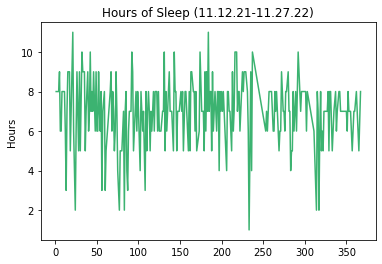

In [53]:
sleepdat['hours'].plot(color = "mediumseagreen")
plt.title('Hours of Sleep (11.12.21-11.27.22)')
plt.ylabel('Hours')
plt.show()

Let's plot the sleep data another way....How about a distribution?

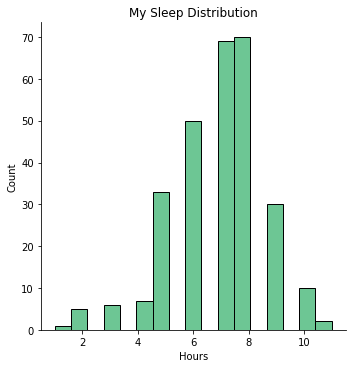

In [56]:
sns.displot(sleepdat['hours'], color="mediumseagreen")
plt.title("My Sleep Distribution")
plt.xlabel("Hours")
plt.show()

Add columns and label for the day of the week 

In [69]:
#convert date column to datetime objects
sleepdat["date"] = pd.to_datetime(sleepdat["date"], format = "%d/%m/%Y")

# Extract the day of the week from the date column
sleepdat["day"] = sleepdat["date"].dt.weekday
sleepdat.head()

,date,deepSleepTime,shallowSleepTime,start,stop,REMTime,diff,hours,day
1,2021-12-11,61.0,400.0,2021-11-11 19:52:00+00:00,2021-11-12 04:11:00+00:00,36.0,0 days 08:19:00,8.0,5
4,2021-11-15,64.0,290.0,2021-11-14 18:26:00+00:00,2021-11-15 02:31:00+00:00,72.0,0 days 08:05:00,8.0,0
5,2021-11-16,60.0,422.0,2021-11-15 19:11:00+00:00,2021-11-16 04:06:00+00:00,46.0,0 days 08:55:00,9.0,1
6,2021-11-17,34.0,267.0,2021-11-16 19:27:00+00:00,2021-11-17 01:40:00+00:00,72.0,0 days 06:13:00,6.0,2
7,2021-11-18,72.0,198.0,2021-11-17 19:35:00+00:00,2021-11-18 01:48:00+00:00,91.0,0 days 06:13:00,6.0,3


In [72]:
#lookup table for day of the week
days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}

# Convert the day index to the day of the week using the lookup table
sleepdat["day_of_week"] = sleepdat["day"].map(days)

#first 5 rows
sleepdat.head()

,date,deepSleepTime,shallowSleepTime,start,stop,REMTime,diff,hours,day,day_of_week
1,2021-12-11,61.0,400.0,2021-11-11 19:52:00+00:00,2021-11-12 04:11:00+00:00,36.0,0 days 08:19:00,8.0,5,Saturday
4,2021-11-15,64.0,290.0,2021-11-14 18:26:00+00:00,2021-11-15 02:31:00+00:00,72.0,0 days 08:05:00,8.0,0,Monday
5,2021-11-16,60.0,422.0,2021-11-15 19:11:00+00:00,2021-11-16 04:06:00+00:00,46.0,0 days 08:55:00,9.0,1,Tuesday
6,2021-11-17,34.0,267.0,2021-11-16 19:27:00+00:00,2021-11-17 01:40:00+00:00,72.0,0 days 06:13:00,6.0,2,Wednesday
7,2021-11-18,72.0,198.0,2021-11-17 19:35:00+00:00,2021-11-18 01:48:00+00:00,91.0,0 days 06:13:00,6.0,3,Thursday


Wonderful! We should probably check and officially see if we have an even amount of data per day (in case I forgot to put it on one night or the battery died), which I know I did.

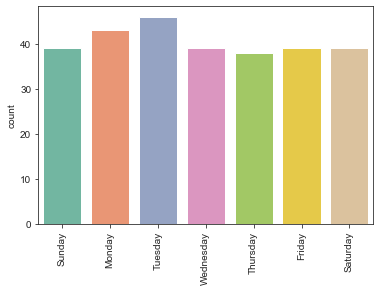

In [106]:
# Make a Bar Plot 
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.countplot(x='day_of_week', data=sleepdat, palette = "Set2", order=order)
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()

All look pretty even except for Monday and Tuesday

How does my sleep vary from day to day? Tuesday seems like a variable

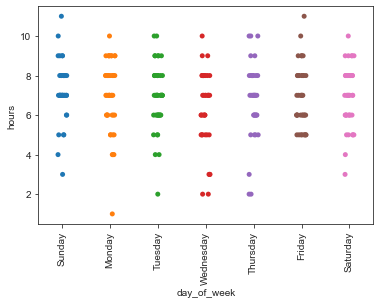

In [105]:
sns.stripplot(x='day_of_week', y= 'hours', data = sleepdat, order=order )
plt.xticks(rotation=90)
plt.ylabel('hours')
plt.show()

Violin plot maybe for a better view

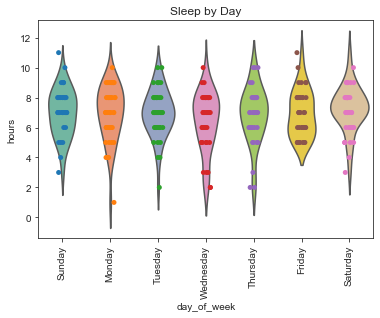

In [104]:
sns.violinplot(x='day_of_week',
               y='hours', 
               data=sleepdat, 
               inner=None, palette = 'Set2' ) # Remove the bars inside the violins

## plot the dots we see above over the violin plot.
sns.stripplot(x='day_of_week', y= 'hours', data = sleepdat, order=order )
plt.xticks(rotation=45)
plt.ylabel('hours')
# Set title with matplotlib
plt.title('Sleep by Day')
plt.xticks(rotation=90)
plt.show()

Let's try a box plot to clearly see the standard errors of my sleep schedule

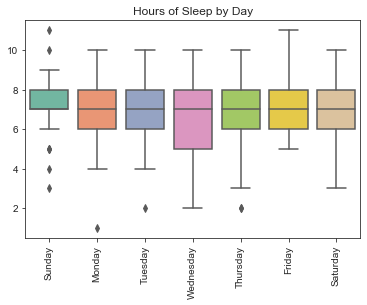

In [103]:
sns.boxplot(x = 'day_of_week', y = 'hours', data = sleepdat, palette = 'Set2', order=order)
plt.title('Hours of Sleep by Day')
plt.xticks(rotation=90)
plt.xlabel("") 
plt.ylabel("")
plt.show()

Yeah, you can clearly see on Sundays my sleep schedule is definitely paranormal.

### Step data

Let's read it in!

In [83]:
#file path
step_data = pd.read_csv("E:/Studies/GitHub/Projects/Exploring my MiFit Data/Bett's MiBand Data/Activity/ACTIVITY_1671526160413.csv")

#first 5 rows
step_data.head()

,date,steps,distance,runDistance,calories
0,11/11/2021,2821,1995,144,62
1,12/11/2021,10629,7876,583,263
2,13/11/2021,4358,3012,282,105
3,14/11/2021,1901,1384,87,44
4,15/11/2021,7702,5500,300,174


Let's add a column for the day of the week just as before

In [88]:
#convert date column to datetime objects
step_data["date"] = pd.to_datetime(step_data["date"], format = "%d/%m/%Y")

# Extract the day of the week from the date column
step_data["day"] = step_data["date"].dt.weekday

#lookup table for day of the week
days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}

# Convert the day index to the day of the week using the lookup table
step_data["day_of_week"] = step_data["day"].map(days)

#first 5 rows
step_data.head()

,date,steps,distance,runDistance,calories,day,day_of_week
0,2021-11-11,2821,1995,144,62,3,Thursday
1,2021-11-12,10629,7876,583,263,4,Friday
2,2021-11-13,4358,3012,282,105,5,Saturday
3,2021-11-14,1901,1384,87,44,6,Sunday
4,2021-11-15,7702,5500,300,174,0,Monday


Awesome! Now before we move on let's check if the steps column are in the correct datatype

In [89]:
step_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         370 non-null    datetime64[ns]
 1   steps        370 non-null    int64         
 2   distance     370 non-null    int64         
 3   runDistance  370 non-null    int64         
 4   calories     370 non-null    int64         
 5   day          370 non-null    int64         
 6   day_of_week  370 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 20.4+ KB


Great it is numeric, let's see my step distribution....

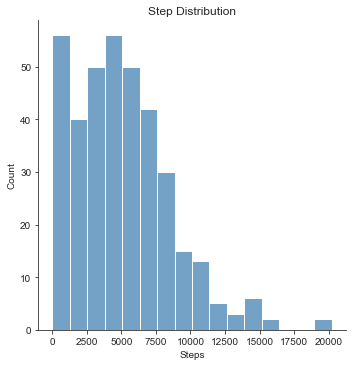

In [91]:
sns.set_style("ticks")
sns.displot(step_data['steps'], color = 'steelblue')
plt.title("Step Distribution")
plt.xlabel("Steps") 
plt.show()

Interesting, the distribution is skewed to the right, I'm guessing towards Friday I was either indoors much or outside since it's the weekend.
Anywho, let's see the steps by day instead of playing the guessing game.

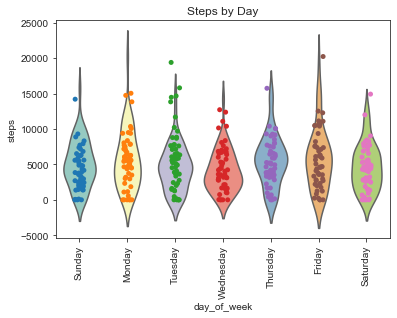

In [102]:
sns.violinplot(x='day_of_week',
               y='steps', 
               data=step_data, 
               inner=None, palette="Set3" ) # Remove the bars inside the violins
            
## plot the dots we see above over the violin plot.
sns.stripplot(x='day_of_week', y= 'steps', data = step_data, order=order )
plt.xticks(rotation=45)
plt.xlabel('day_of_week')
plt.ylabel('steps')
plt.title('Steps by Day')
plt.xticks(rotation=90)
plt.show()

Boxplot to see the standard errors in my steps clearly

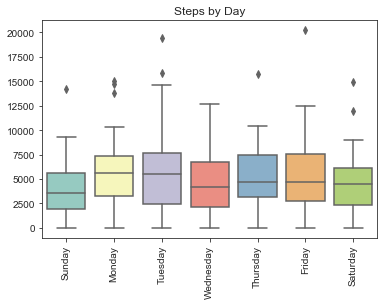

In [101]:
sns.boxplot(x = 'day_of_week', y = 'steps', data = step_data, palette="Set3", order=order)
plt.title('Steps by Day')
plt.xticks(rotation=90)
plt.xlabel("") 
plt.ylabel("")
plt.show()

## 3. Analyses!

### Linear Regression model

### 1. Am I more active on days after I get more sleep?

In the model below, I am predicting my steps from the hours of sleep I got the night before, using an ordinary least squares regression model. Below is the code for the model, fitting the model, and displaying the results.

First, create variable for the previous night's sleep and align it properly.

In [122]:
#merge the dataframes on date column to compare the hours and step data
merged_df = pd.merge(step_data, sleepdat, on='date', how='inner')

#now create the variable for the previous nights sleep abd align properly
merged_df["hours_prev"] = merged_df.shift(1).hours
merged_df.head()

,date,steps,distance,runDistance,calories,day_x,day_of_week_x,deepSleepTime,shallowSleepTime,start,stop,REMTime,diff,hours,day_y,day_of_week_y,hours_prev
0,2021-11-12,10629,7876,583,263,4,Friday,57.0,180.0,2021-12-10 21:31:00+00:00,2021-12-11 02:22:00+00:00,52.0,0 days 04:51:00,5.0,4,Friday,NaN
1,2021-11-15,7702,5500,300,174,0,Monday,64.0,290.0,2021-11-14 18:26:00+00:00,2021-11-15 02:31:00+00:00,72.0,0 days 08:05:00,8.0,0,Monday,5.0
2,2021-11-16,3901,2737,134,84,1,Tuesday,60.0,422.0,2021-11-15 19:11:00+00:00,2021-11-16 04:06:00+00:00,46.0,0 days 08:55:00,9.0,1,Tuesday,8.0
3,2021-11-17,6744,4696,410,147,2,Wednesday,34.0,267.0,2021-11-16 19:27:00+00:00,2021-11-17 01:40:00+00:00,72.0,0 days 06:13:00,6.0,2,Wednesday,9.0
4,2021-11-18,9303,6636,391,216,3,Thursday,72.0,198.0,2021-11-17 19:35:00+00:00,2021-11-18 01:48:00+00:00,91.0,0 days 06:13:00,6.0,3,Thursday,6.0


Awesome! Now let's create a dataframe to only have the relevant columns for analysis

In [124]:
#select the column
stepsdf = merged_df.loc[:,['date', 'steps', 'day_y', 'day_of_week_y', 'hours', 'hours_prev']]
stepsdf.head()

,date,steps,day_y,day_of_week_y,hours,hours_prev
0,2021-11-12,10629,4,Friday,5.0,NaN
1,2021-11-15,7702,0,Monday,8.0,5.0
2,2021-11-16,3901,1,Tuesday,9.0,8.0
3,2021-11-17,6744,2,Wednesday,6.0,9.0
4,2021-11-18,9303,3,Thursday,6.0,6.0


In [126]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
mod1 = smf.ols(formula = "steps ~ hours_prev", data = stepsdf).fit()
mod1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6205.3003,920.996,6.738,0.000,4391.837,8018.764
hours_prev,-108.5052,129.769,-0.836,0.404,-364.025,147.014


From the regression table we can see that how many hours I slept the previous night(hours_prev) does not predict the amount of steps I take the next day. This might be because of a variety of reasons;
1. I only had the band for about 8 months and there are times the battery would have died or I would simply forget to wear the band.
2. I'm a Graduate student and my sleep is incredibly variable

Long story short is we need more data!

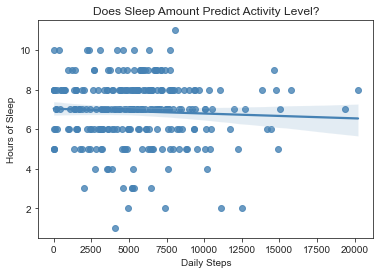

In [127]:
sns.regplot(x = stepsdf.steps, y = stepsdf.hours_prev, color = 'steelblue')
plt.xlabel("Daily Steps")
plt.ylabel("Hours of Sleep")
plt.title("Does Sleep Amount Predict Activity Level?")
plt.show()

From the graph, we can see the line is flat as a pancake, no linear relationship at all!

### Question 2: Do I need more sleep the night after I don't get a lot of sleep? Am I creating a sleep deficit?

In the model below, I am predicting the difference in amount of sleep I get from the hours of sleep I got the night before using ordinary least square regression.

Let's first create a sleep variable to capture the difference in amount of sleep I got before.

In [129]:
stepsdf["hours_diff"] = stepsdf.hours - stepsdf.hours_prev
stepsdf.head()

,date,steps,day_y,day_of_week_y,hours,hours_prev,hours_diff
0,2021-11-12,10629,4,Friday,5.0,NaN,NaN
1,2021-11-15,7702,0,Monday,8.0,5.0,3.0
2,2021-11-16,3901,1,Tuesday,9.0,8.0,1.0
3,2021-11-17,6744,2,Wednesday,6.0,9.0,-3.0
4,2021-11-18,9303,3,Thursday,6.0,6.0,0.0


Perfect!

In [130]:
#fit the model
mod2 = smf.ols(formula = 'hours_diff ~ hours_prev', data = stepsdf).fit()
mod2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.4838,0.436,14.868,0.000,5.625,7.342
hours_prev,-0.9383,0.061,-15.271,0.000,-1.059,-0.817


The model shows that how many hours I slept the previous night ('hours_prev') negatively predicts the amount of sleep I get the next day, this is because we have a negative coefficient from the regression table.

Let's visualize the relationship.

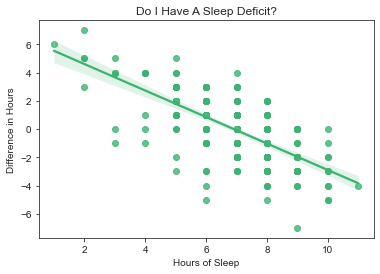

In [131]:
#how much more I slept each night vs. amount slept night before
sns.regplot(x = stepsdf.hours_prev, y = stepsdf.hours_diff, color = "mediumseagreen")
plt.title("Do I Have A Sleep Deficit?")
plt.ylabel("Difference in Hours")
plt.xlabel("Hours of Sleep")
plt.show()

This is proof of the negative relationship we saw on the regression table!

## 4. Summary & Next steps

In sum, we have exported Xiaomi MiBand data, worked with csv data, visualized our data, and we ran two linear regressions. We found that my activity level is independent from how much sleep I get and that I built up a sleep deficit over time. Feels like a flex!!

What I would like to do next is collect more data! I would also like to create some interactive visuals and run some more sophisticated models on my data. 
##### Finally if you have suggestions on how I can improve, sources of how I can improve my code or comments please let me know, I'm using this space to learn and share

THANKS!!